In [ ]:
pip install wordcloud

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

The dataset I am using for Pfizer vaccine sentiment analysis was downloaded from Kaggle (https://www.kaggle.com/datasets/gpreda/all-covid19-vaccines-tweets?resource=download). It was originally collected from Twitter, capturing people's opinions about the Pfizer vaccine.

In [2]:
data = pd.read_csv("https://raw.githubusercontent.com/Abim-Ayeni/abim-ayeni.github.io/refs/heads/main/vaccination_all_tweets.csv")
print(data.head())

                    id             user_name              user_location  \
0  1340539111971516416            Rachel Roh  La Crescenta-Montrose, CA   
1  1338158543359250433           Albert Fong          San Francisco, CA   
2  1337858199140118533              eli🇱🇹🇪🇺👌                   Your Bed   
3  1337855739918835717         Charles Adler     Vancouver, BC - Canada   
4  1337854064604966912  Citizen News Channel                        NaN   

                                    user_description         user_created  \
0  Aggregator of Asian American news; scanning di...  2009-04-08 17:52:46   
1  Marketing dude, tech geek, heavy metal & '80s ...  2009-09-21 15:27:30   
2                                     heil, hydra 🖐☺  2020-06-25 23:30:28   
3  Hosting "CharlesAdlerTonight" Global News Radi...  2008-09-10 11:28:53   
4  Citizen News Channel bringing you an alternati...  2020-04-23 17:58:42   

   user_followers  user_friends  user_favourites  user_verified  \
0             405  

DATA CLEANING & PROCESSING

To implement data cleaning steps, i remove null values even though they won’t impact sentiment analysis directly. Since the dataset is already large, dropping rows with null values helps streamline the process. Next, the text data will be converted to lowercase for consistency. I will remove URLs, HTML tags, special characters, and punctuation to focus on the core text. Stopwords, which add little meaning, will also be removed. Finally, I’ll apply stemming to reduce words to their base forms, aiding in more accurate sentiment classification.

In [3]:
data.isnull().sum()

id                      0
user_name               2
user_location       66911
user_description    17023
user_created            0
user_followers          0
user_friends            0
user_favourites         0
user_verified           0
date                    0
text                    0
hashtags            49703
source                119
retweets                0
favorites               0
is_retweet              0
dtype: int64

In [4]:
data = data.dropna()

The text column is the primary focus for sentiment analysis, as it contains users' opinions on Twitter about the Pfizer vaccine, making it the most crucial feature for this task. However, the text requires preparation, as it includes many special symbols and language inconsistencies.

In [5]:
import nltk
import re
nltk.download('stopwords')
stemmer = nltk.SnowballStemmer("english")
from nltk.corpus import stopwords
import string
stopword=set(stopwords.words('english'))

def clean(text):
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = [word for word in text.split(' ') if word not in stopword]
    text=" ".join(text)
    text = [stemmer.stem(word) for word in text.split(' ')]
    text=" ".join(text)
    return text
data["text"] = data["text"].apply(clean)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\aayeni\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Using the data visualisation technique, world cloud, we see the most used words in large fonts and less used words in smaller fonts

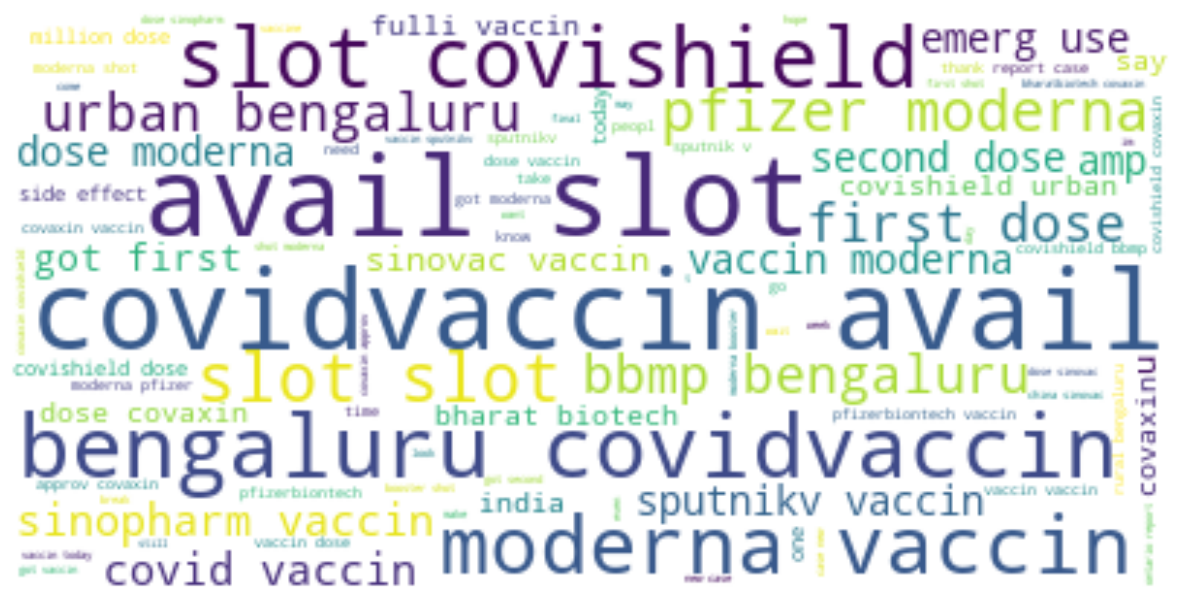

In [6]:
text = " ".join(i for i in data.text)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

Also looking at the hashtag columns to see the kind of tags used in the tweets that was trending about the Pfizer vaccine

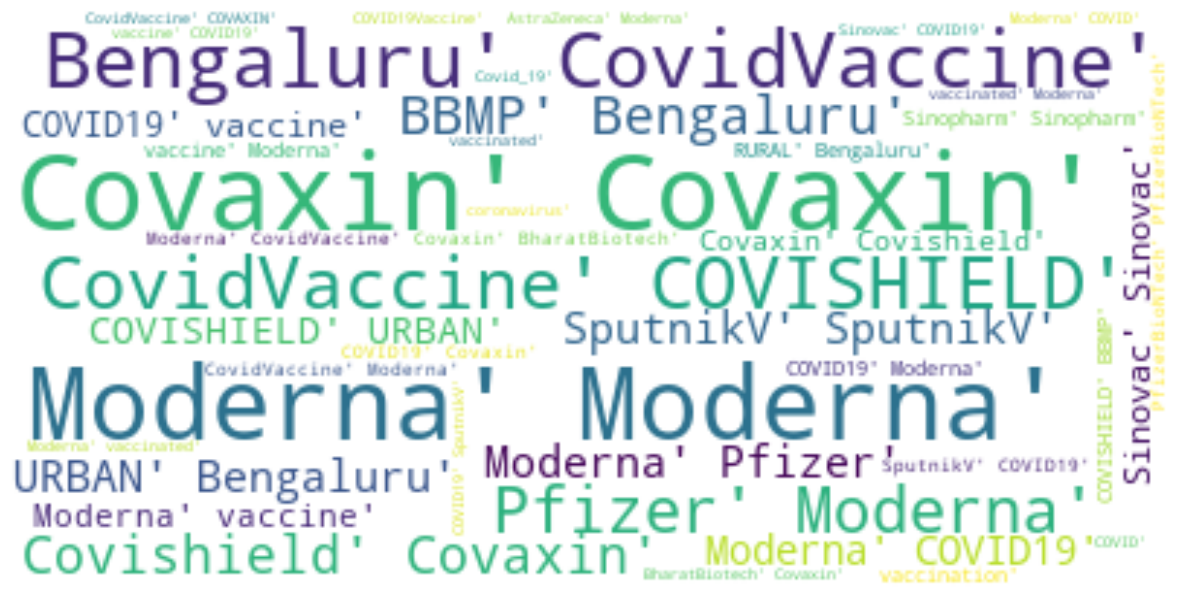

In [7]:
text = " ".join(i for i in data.hashtags)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

IMPLEMENTING SENTIMENT ANALYSIS

I classify the sentiments into three values 'Positive', 'Negative' and 'Neutral' by calculating the sentiment scores of the "text column" in the dataset with vader_lexicon a pre-trained sentiment analysis model in the NLTK library.

In [8]:
nltk.download('vader_lexicon')
sentiments = SentimentIntensityAnalyzer()
data["Positive"] = [sentiments.polarity_scores(i)["pos"] for i in data["text"]]
data["Negative"] = [sentiments.polarity_scores(i)["neg"] for i in data["text"]]
data["Neutral"] = [sentiments.polarity_scores(i)["neu"] for i in data["text"]]
data = data[["text", "Positive", "Negative", "Neutral"]]
print(data.head())

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\aayeni\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


                                                 text  Positive  Negative  \
0   folk said daikon past could treat cytokin stor...     0.252     0.000   
2   coronavirus sputnikv astrazeneca pfizerbiontec...     0.000     0.000   
6   bit sad claim fame success vaccin patriot comp...     0.353     0.166   
9   covidvaccin state start get  monday us say pak...     0.000     0.000   
10  death close  mark million peopl wait pfizerbio...     0.000     0.302   

    Neutral  
0     0.748  
2     1.000  
6     0.481  
9     1.000  
10    0.698  


Calculating how most people from the tweets fely about hee Pfizer vaccine

In [9]:
x = sum(data["Positive"])
y = sum(data["Negative"])
z = sum(data["Neutral"])

def sentiment_score(a, b, c):
    if (a>b) and (a>c):
        print("Positive 😊 ")
    elif (b>a) and (b>c):
        print("Negative 😠 ")
    else:
        print("Neutral 🙂 ")
sentiment_score(x, y, z)

Neutral 🙂 


As the majority of users' opinions appear to be Neutral, let's review the total count for each sentiment score before drawing any conclusions

In [10]:
print("Positive: ", x)
print("Negative: ", y)
print("Neutral: ", z)

Positive:  8268.533999999987
Negative:  4133.890999999924
Neutral:  103641.03400000304


From the sentiment score, the total of Positive and Negative is less than Neutral so we can conclude that the discussion on twitter usesrs was about the awareness of the Pfizer vaccine rather than sharing its benefits or drawbacks.